Let's install some libraries for visualization.


In [1]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (436 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 783 kB of 

In [2]:
from pyvirtualdisplay import Display
Display().start()

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [3]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)

        # hyperparameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def memorize(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

In [4]:
if __name__ == "__main__":
    # creating the environment for Cart Pole
    env = gym.make('CartPole-v1')
    
    # reseting the environment so that it returns the initial state
    state = env.reset()

    # img = plt.imshow(env.render('rgb_array')) # only call this once
    # episode_dict = {}

    # board is an 2x2 matrix which is used for saving the states for plotting 
    board = []

    #  There are 4 states for the CartPole  [position of cart, velocity of cart, angle of pole, rotation rate of pole]
    state_size = env.observation_space.shape[0]

    # There are 2 actions available  [0:Push cart to the left, 1:	Push cart to the right]
    action_size = env.action_space.n

    # create an agent instance 
    agent = DQNAgent(state_size, action_size)

    # game is not over so that done is set to False
    done = False
    # batch_size is for training neural network.
    batch_size = 10


    # Number of games to play
    EPISODES = 60

    for e in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        board.append([])

        # maximum score is 500. 
        for time in range(500):
        
            # saving  each try in each episode to a 2d array. We will use it for visualization later.
            board[e].append(env.render('rgb_array'))

            #  Perform the action. Either 0 to left ot 1 to right.
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)

            # check the new state and update the reward
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, state_size])

            # Save the previous episodes to use them for training later.
            agent.memorize(state, action, reward, next_state, done)
            state = next_state

            # If we loose the game in the episode, it reports
            if done:
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, EPISODES, time, agent.epsilon))
                break

            # If there are enough samples in the memory, use them for training
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)

episode: 0/60, score: 25, e: 0.93
episode: 1/60, score: 19, e: 0.84
episode: 2/60, score: 13, e: 0.79
episode: 3/60, score: 17, e: 0.73
episode: 4/60, score: 9, e: 0.69
episode: 5/60, score: 10, e: 0.66
episode: 6/60, score: 12, e: 0.62
episode: 7/60, score: 14, e: 0.58
episode: 8/60, score: 11, e: 0.55
episode: 9/60, score: 9, e: 0.52
episode: 10/60, score: 13, e: 0.49
episode: 11/60, score: 12, e: 0.46
episode: 12/60, score: 8, e: 0.44
episode: 13/60, score: 13, e: 0.42
episode: 14/60, score: 8, e: 0.4
episode: 15/60, score: 14, e: 0.37
episode: 16/60, score: 19, e: 0.34
episode: 17/60, score: 10, e: 0.32
episode: 18/60, score: 8, e: 0.31
episode: 19/60, score: 10, e: 0.29
episode: 20/60, score: 8, e: 0.28
episode: 21/60, score: 8, e: 0.27
episode: 22/60, score: 8, e: 0.26
episode: 23/60, score: 10, e: 0.25
episode: 24/60, score: 11, e: 0.23
episode: 25/60, score: 11, e: 0.22
episode: 26/60, score: 12, e: 0.21
episode: 27/60, score: 9, e: 0.2
episode: 28/60, score: 10, e: 0.19
episod

In [ ]:
def show_me_episode(episode_number):
  img = plt.imshow(env.render('rgb_array')) # only call this once
  for i in range(len(board[episode_number])):
    fr = board[episode_number][i]
    img.set_data(fr) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [ ]:
# To see any specific episode
show_me_episode(57)

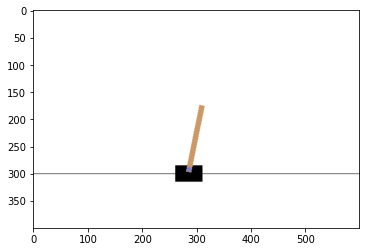

In [ ]:
for k in range(len(board)):
  show_me_episode(k)